In [1]:
import numpy as np 
import pandas as pd
import pickle
import datetime
from sklearn.model_selection import train_test_split
from pmdarima import auto_arima
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('london_energy.csv')

In [3]:
data.head()


,House_number,Date,Energy Demand
0,1,12-10-2017,7.098
1,1,13-10-2017,11.087
2,1,14-10-2017,13.223
3,1,15-10-2017,10.257
4,1,16-10-2017,9.769


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   House_number   2542 non-null   int64  
 1   Date           2542 non-null   object 
 2   Energy Demand  2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [5]:

data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y")

print(data['Date'])




0      2017-10-12
1      2017-10-13
2      2017-10-14
3      2017-10-15
4      2017-10-16
          ...    
2537   2019-02-24
2538   2019-02-25
2539   2019-02-26
2540   2019-02-27
2541   2019-02-28
Name: Date, Length: 2542, dtype: datetime64[ns]


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   House_number   2542 non-null   int64         
 1   Date           2542 non-null   datetime64[ns]
 2   Energy Demand  2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [7]:
data.set_index('Date' ,inplace= True)
data.head()


,House_number,Energy Demand
Date,,
2017-10-12,1,7.098
2017-10-13,1,11.087
2017-10-14,1,13.223
2017-10-15,1,10.257
2017-10-16,1,9.769


In [8]:
def find_outliers(data):
    q1, q3 = np.percentile(data, [25, 75])
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    outliers = []
    for point in data:
        if point < lower_bound or point > upper_bound:
            outliers.append(point)

    return outliers

In [9]:
find_outliers(data["Energy Demand"])

[32.628,
 39.284,
 32.856,
 28.659,
 32.218,
 48.174,
 42.511,
 44.267,
 44.65,
 42.545,
 41.155,
 31.727,
 32.283,
 32.761,
 34.804,
 40.805,
 40.741,
 41.918,
 40.507,
 42.922,
 45.128,
 41.554,
 39.796,
 43.099,
 44.662,
 42.33,
 43.22,
 41.718,
 41.584,
 42.458,
 44.301,
 43.213,
 45.4,
 41.452,
 43.531,
 41.014,
 42.112,
 44.175,
 42.62,
 43.927,
 47.0,
 41.53,
 37.122,
 39.844,
 42.543,
 45.181,
 39.92,
 38.593,
 44.157,
 40.295,
 39.043,
 39.645,
 41.644,
 39.806,
 40.185,
 40.282,
 40.258,
 40.689,
 43.441,
 42.574,
 40.057,
 35.001,
 36.17,
 37.327,
 47.99,
 46.483,
 43.496,
 45.641,
 40.698,
 42.639,
 43.096,
 40.106,
 41.21,
 40.569,
 40.441,
 43.321,
 39.737,
 40.286,
 43.625,
 42.32,
 41.473,
 40.345,
 42.594,
 41.367,
 40.765,
 41.606,
 40.257,
 41.006,
 42.039,
 45.157,
 43.29,
 40.939,
 43.358,
 41.769,
 38.933,
 42.413,
 40.041,
 42.63,
 41.497,
 45.066,
 48.269,
 41.916,
 41.119,
 35.237,
 36.999,
 44.955,
 40.821,
 39.762,
 40.745,
 44.253,
 42.189,
 39.08,
 35.577,


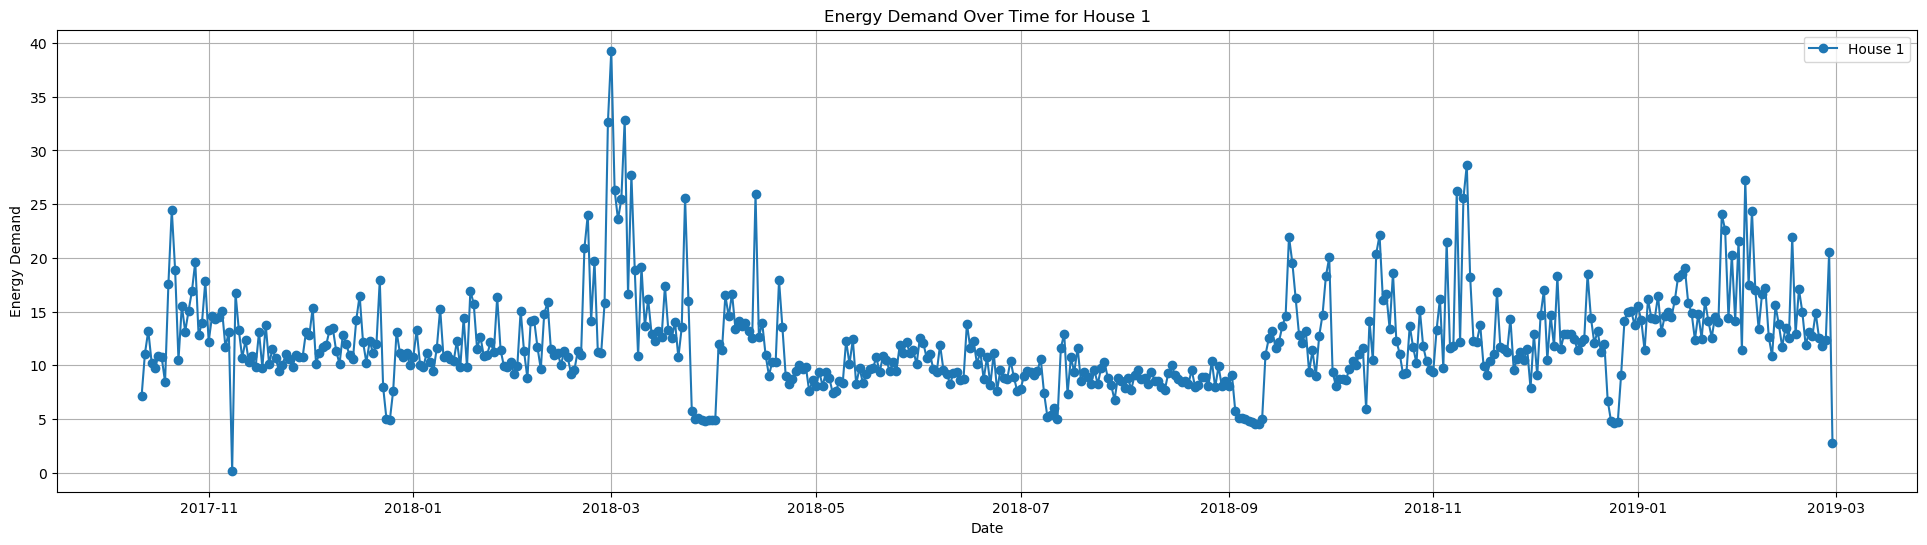

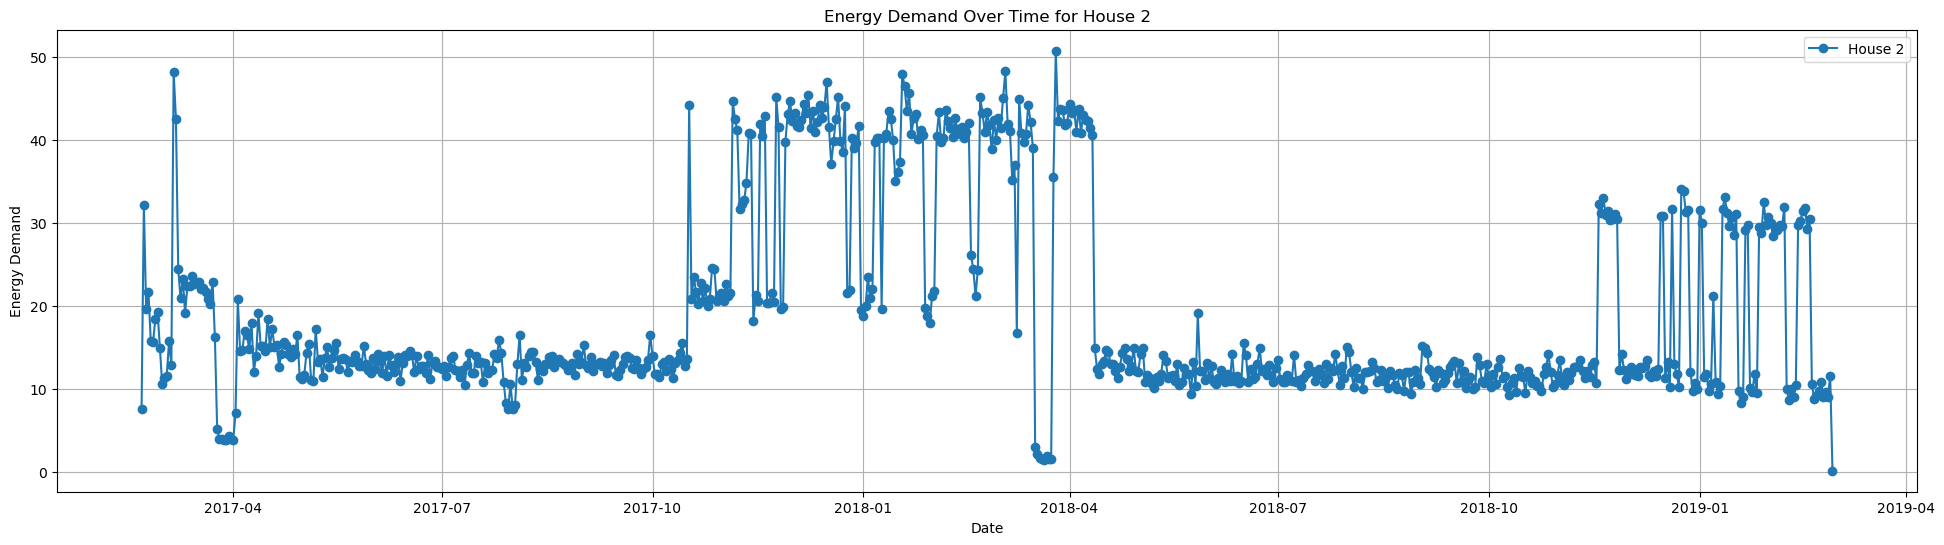

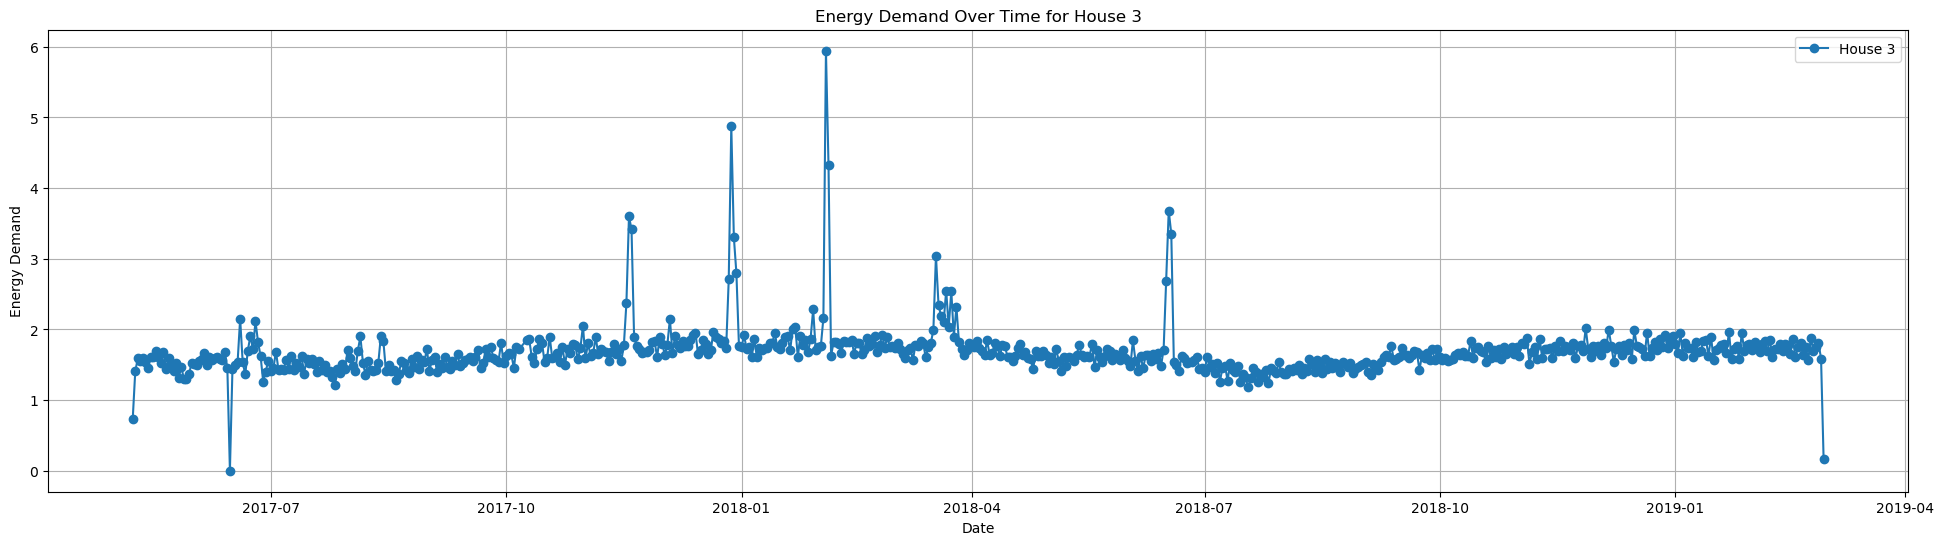

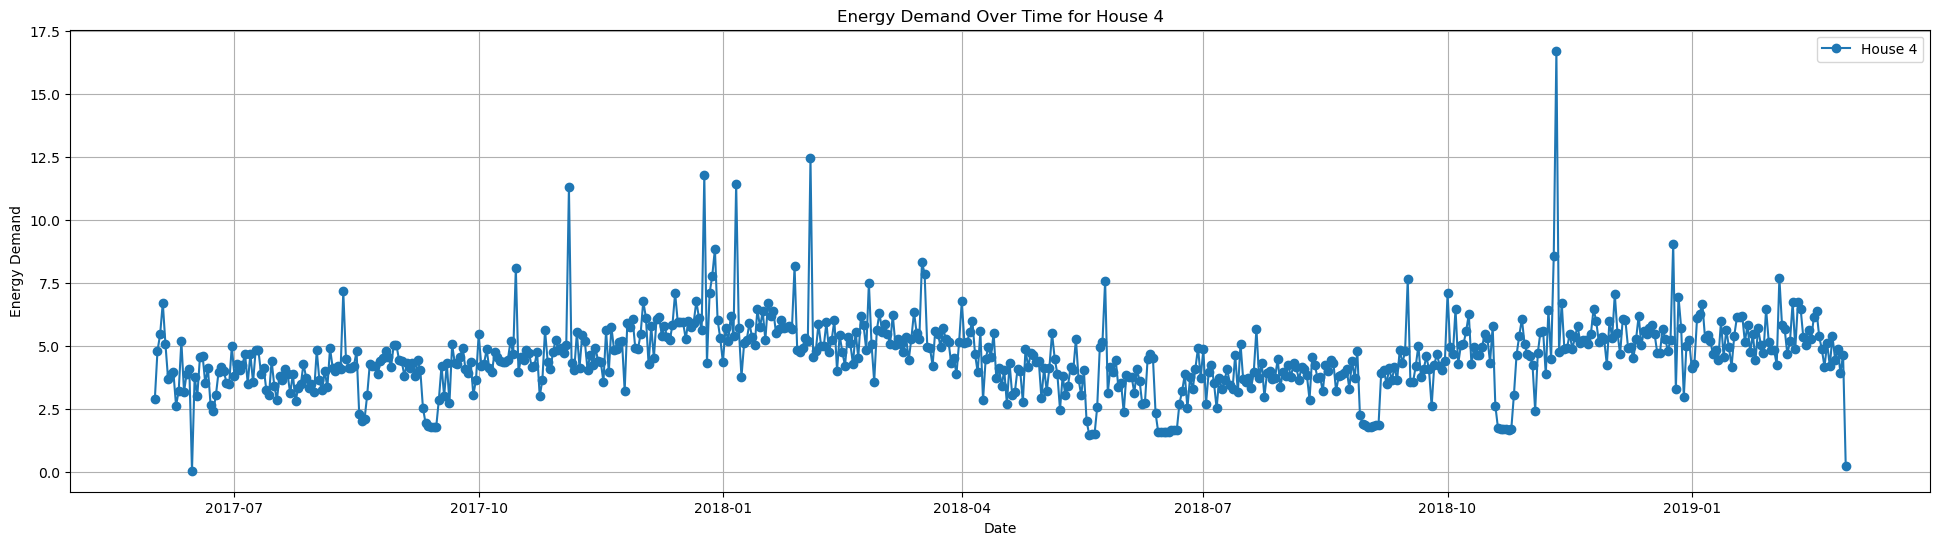

In [10]:
import matplotlib.pyplot as plt


house_numbers = data['House_number'].unique()

for house_number in house_numbers:
    plt.figure(figsize=(24, 6))
    plt.plot(data[data['House_number'] == house_number].index, 
             data[data['House_number'] == house_number]['Energy Demand'], 
             marker='o', linestyle='-', label=f'House {house_number}')
    plt.title(f'Energy Demand Over Time for House {house_number}')
    plt.xlabel('Date')
    plt.ylabel('Energy Demand')
    plt.legend()
    plt.grid(True)
    plt.show()


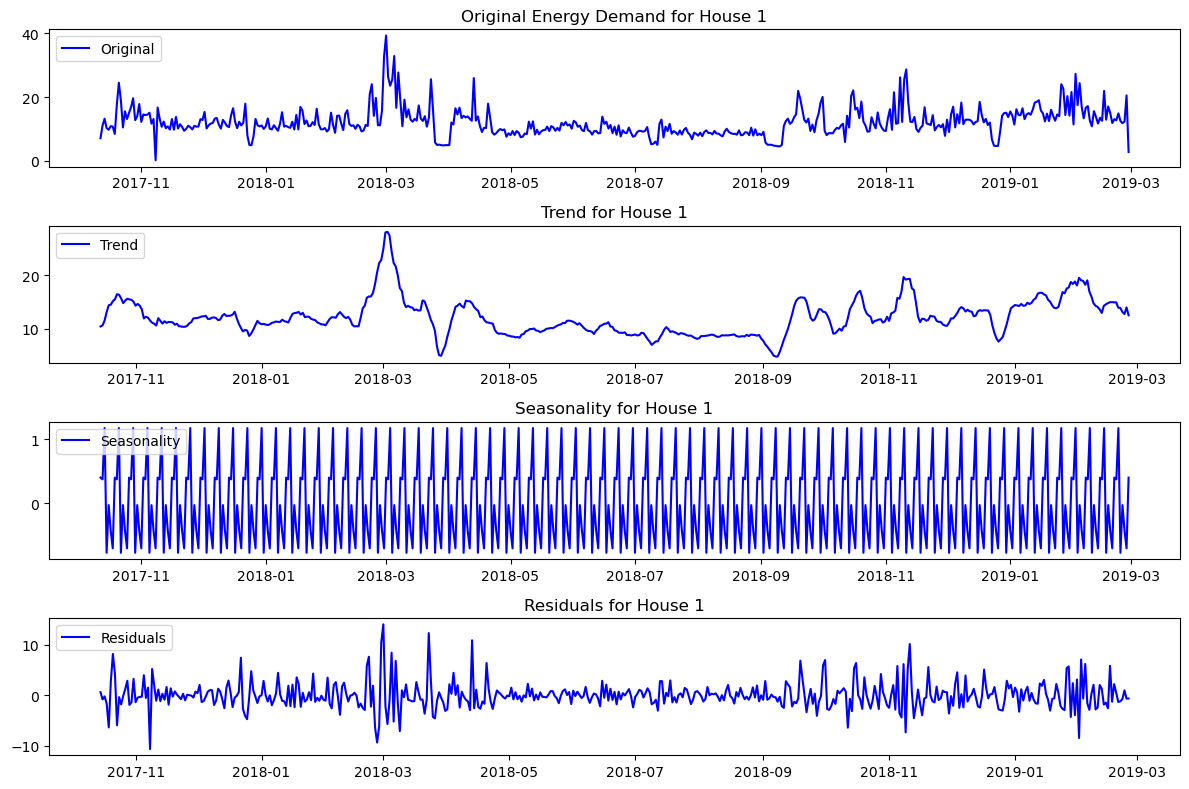

<Figure size 1000x600 with 0 Axes>

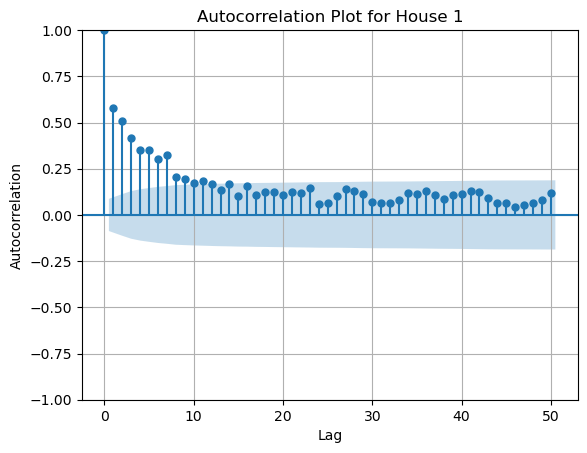

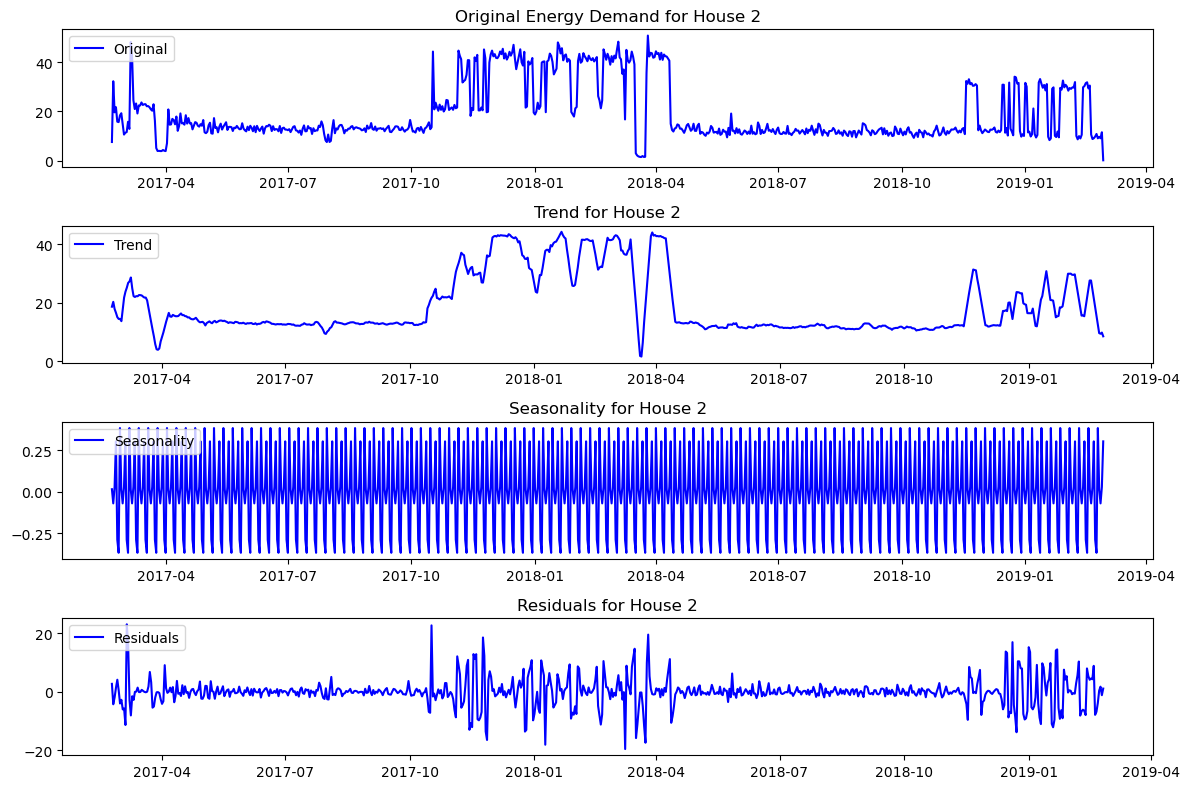

<Figure size 1000x600 with 0 Axes>

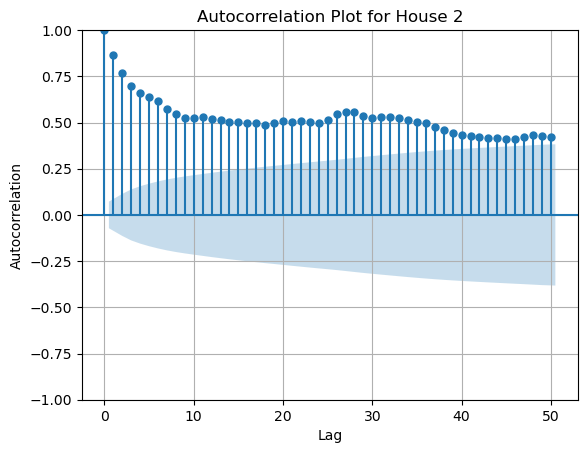

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf


house_numbers = data['House_number'].unique()

for house_number in house_numbers:
    house_data = data[data['House_number'] == house_number]['Energy Demand']

    
    decomposition = seasonal_decompose(house_data, model='additive' )  
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
  
    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(house_data.index, house_data, label='Original', color='blue')
    plt.legend(loc='upper left')
    plt.title(f'Original Energy Demand for House {house_number}')
    plt.subplot(412)
    plt.plot(house_data.index, trend, label='Trend', color='blue')
    plt.legend(loc='upper left')
    plt.title(f'Trend for House {house_number}')
    plt.subplot(413)
    plt.plot(house_data.index, seasonal, label='Seasonality', color='blue')
    plt.legend(loc='upper left')
    plt.title(f'Seasonality for House {house_number}')
    plt.subplot(414)
    plt.plot(house_data.index, residual, label='Residuals', color='blue')
    plt.legend(loc='upper left')
    plt.title(f'Residuals for House {house_number}')
    plt.tight_layout()
    plt.show()
    

    plt.figure(figsize=(10, 6))
    plot_acf(house_data, lags=min(50, len(house_data)-1))
    plt.title(f'Autocorrelation Plot for House {house_number}')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True)
    plt.show()



In [13]:


Q1 = data['Energy Demand'].quantile(0.25)
Q3 = data['Energy Demand'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Energy Demand'] < lower_bound) | (data['Energy Demand'] > upper_bound)]

cleaned_data = data[~((data['Energy Demand'] < lower_bound) | (data['Energy Demand'] > upper_bound))]

print("Outliers:")
print(outliers)

print("\nCleaned Data:")
print(cleaned_data)


Outliers:
            House_number  Energy Demand
Date                                   
2018-02-28             1         32.628
2018-03-01             1         39.284
2018-03-05             1         32.856
2018-11-11             1         28.659
2017-02-21             2         32.218
...                  ...            ...
2019-02-14             2         30.235
2019-02-15             2         31.449
2019-02-16             2         31.791
2019-02-17             2         29.306
2019-02-18             2         30.476

[174 rows x 2 columns]

Cleaned Data:
            House_number  Energy Demand
Date                                   
2017-10-12             1          7.098
2017-10-13             1         11.087
2017-10-14             1         13.223
2017-10-15             1         10.257
2017-10-16             1          9.769
...                  ...            ...
2019-02-24             4          4.448
2019-02-25             4          4.865
2019-02-26             4       

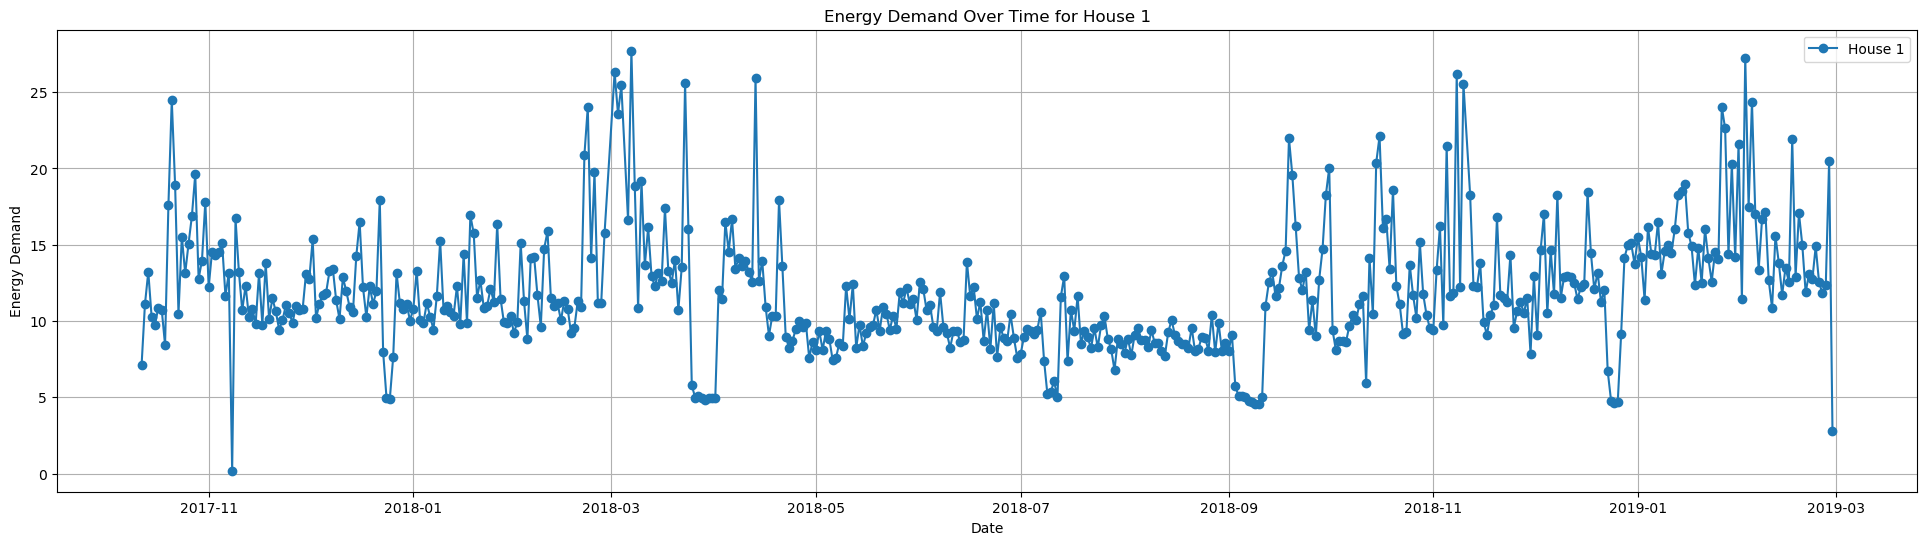

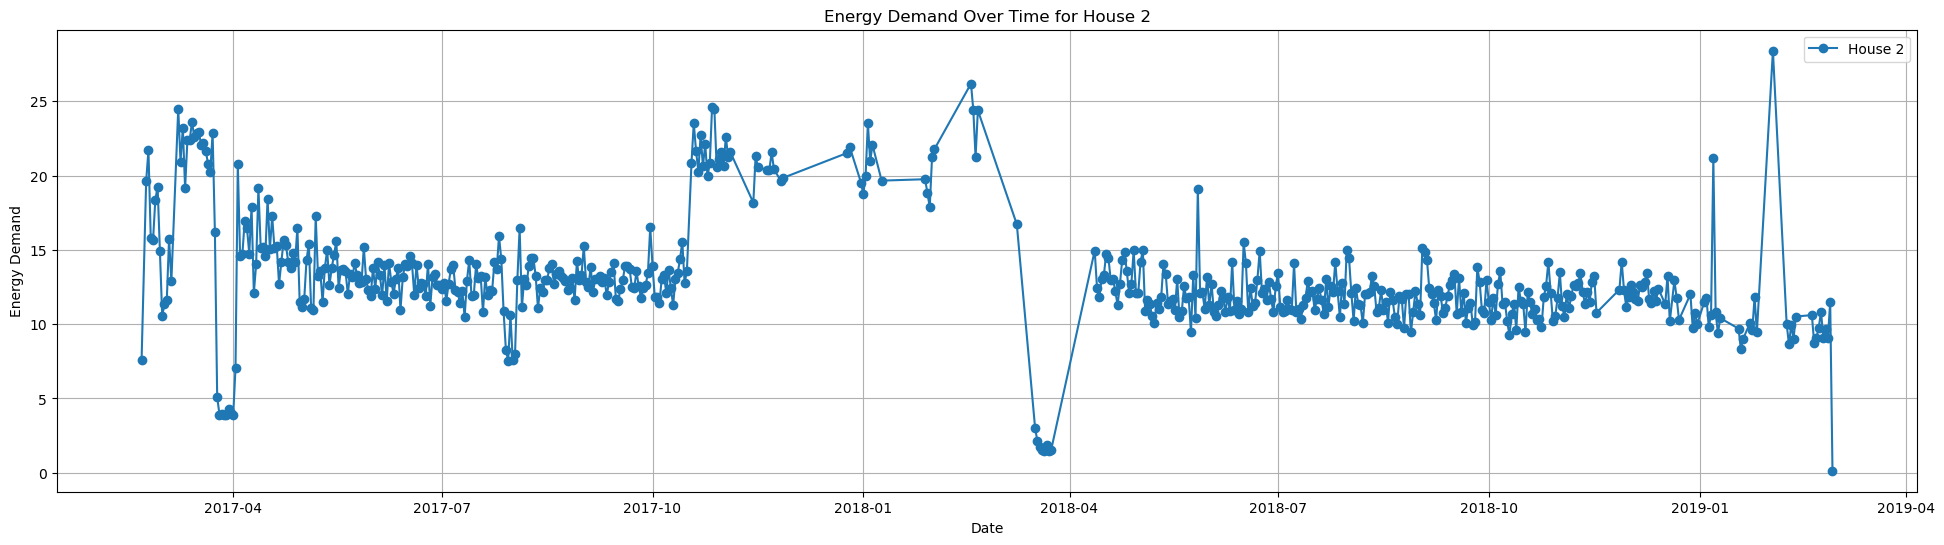

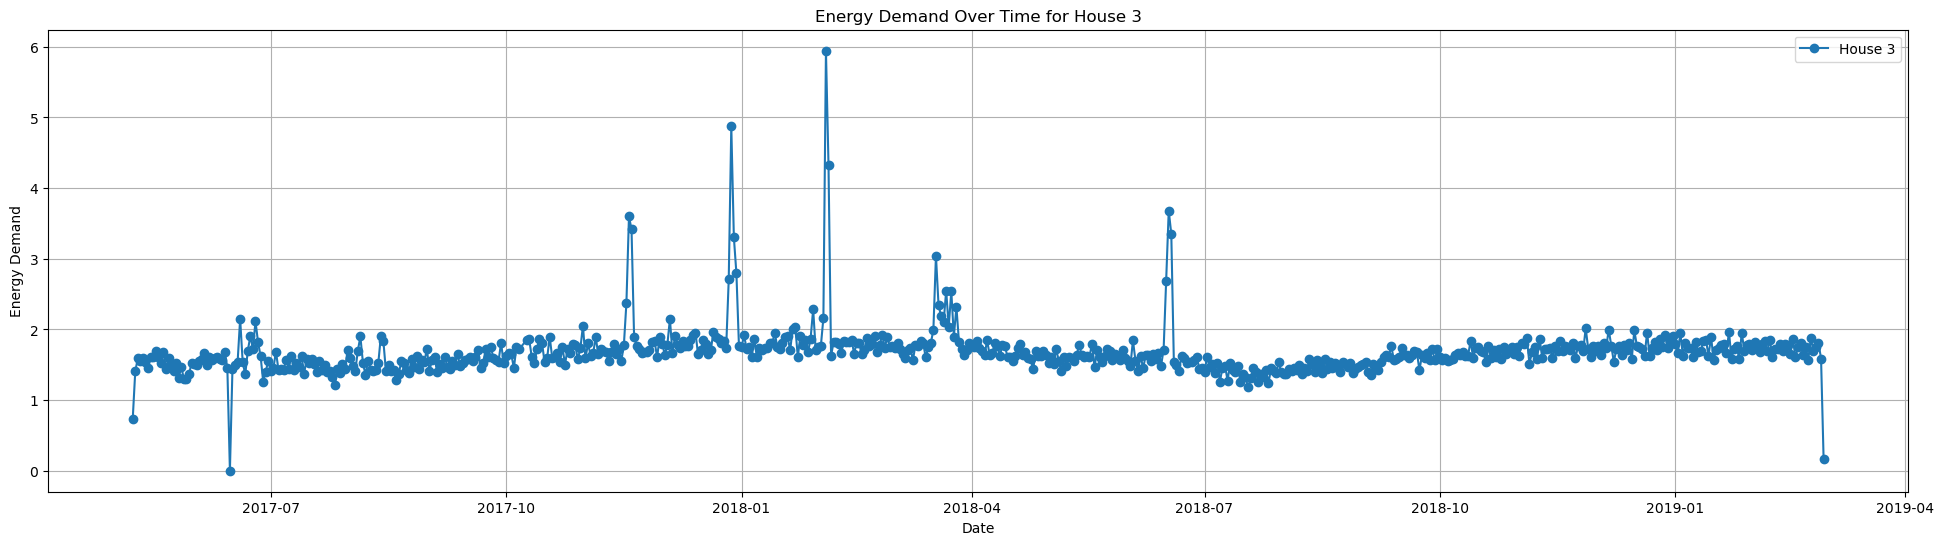

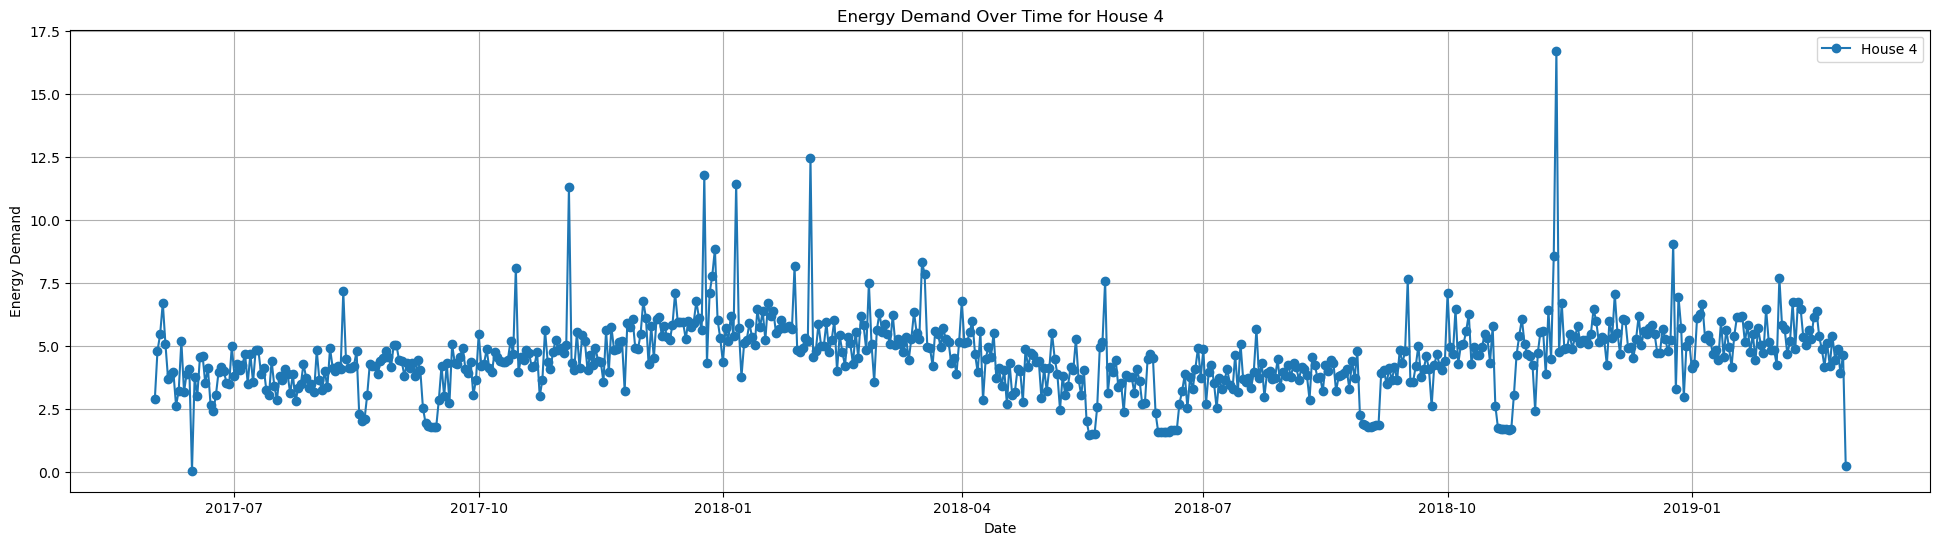

In [14]:
house_numbers = cleaned_data['House_number'].unique()

for house_number in house_numbers:
    plt.figure(figsize=(24, 6))
    plt.plot(cleaned_data[cleaned_data['House_number'] == house_number].index, 
             cleaned_data[cleaned_data['House_number'] == house_number]['Energy Demand'], 
             marker='o', linestyle='-', label=f'House {house_number}')
    plt.title(f'Energy Demand Over Time for House {house_number}')
    plt.xlabel('Date')
    plt.ylabel('Energy Demand')
    plt.legend()
    plt.grid(True)
    plt.show()


In [15]:
from scipy import stats

z_scores = stats.zscore(cleaned_data['Energy Demand'])


threshold = 2


outliers = cleaned_data[abs(z_scores) > threshold]


cleaned1_data = cleaned_data[abs(z_scores) <= threshold]


print("Outliers:")
print(outliers)


print("\nCleaned Data:")
print(cleaned1_data)


Outliers:
            House_number  Energy Demand
Date                                   
2017-10-21             1         24.490
2017-10-22             1         18.885
2017-10-28             1         19.629
2018-02-21             1         20.912
2018-02-22             1         24.018
...                  ...            ...
2018-02-19             2         21.235
2018-02-20             2         24.387
2018-05-27             2         19.107
2019-01-07             2         21.163
2019-02-02             2         28.395

[99 rows x 2 columns]

Cleaned Data:
            House_number  Energy Demand
Date                                   
2017-10-12             1          7.098
2017-10-13             1         11.087
2017-10-14             1         13.223
2017-10-15             1         10.257
2017-10-16             1          9.769
...                  ...            ...
2019-02-24             4          4.448
2019-02-25             4          4.865
2019-02-26             4        

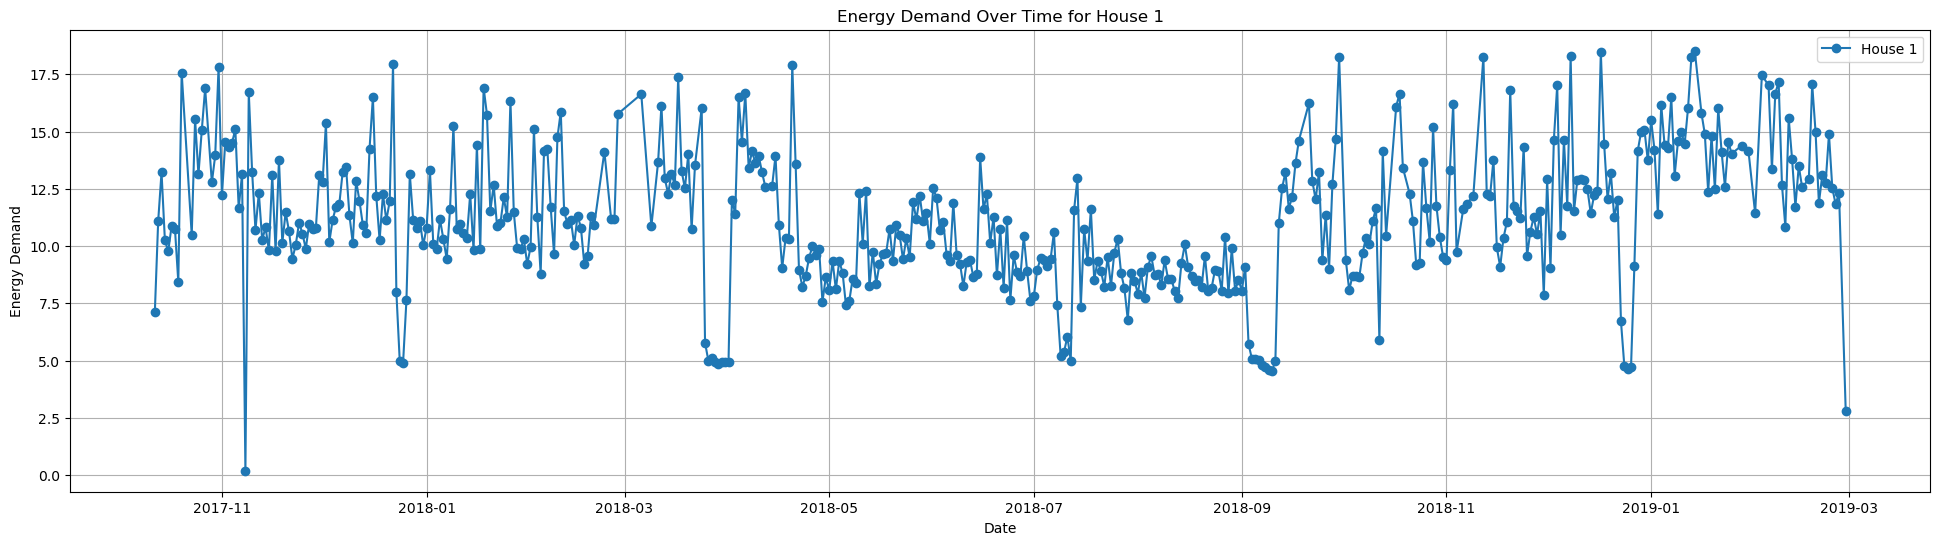

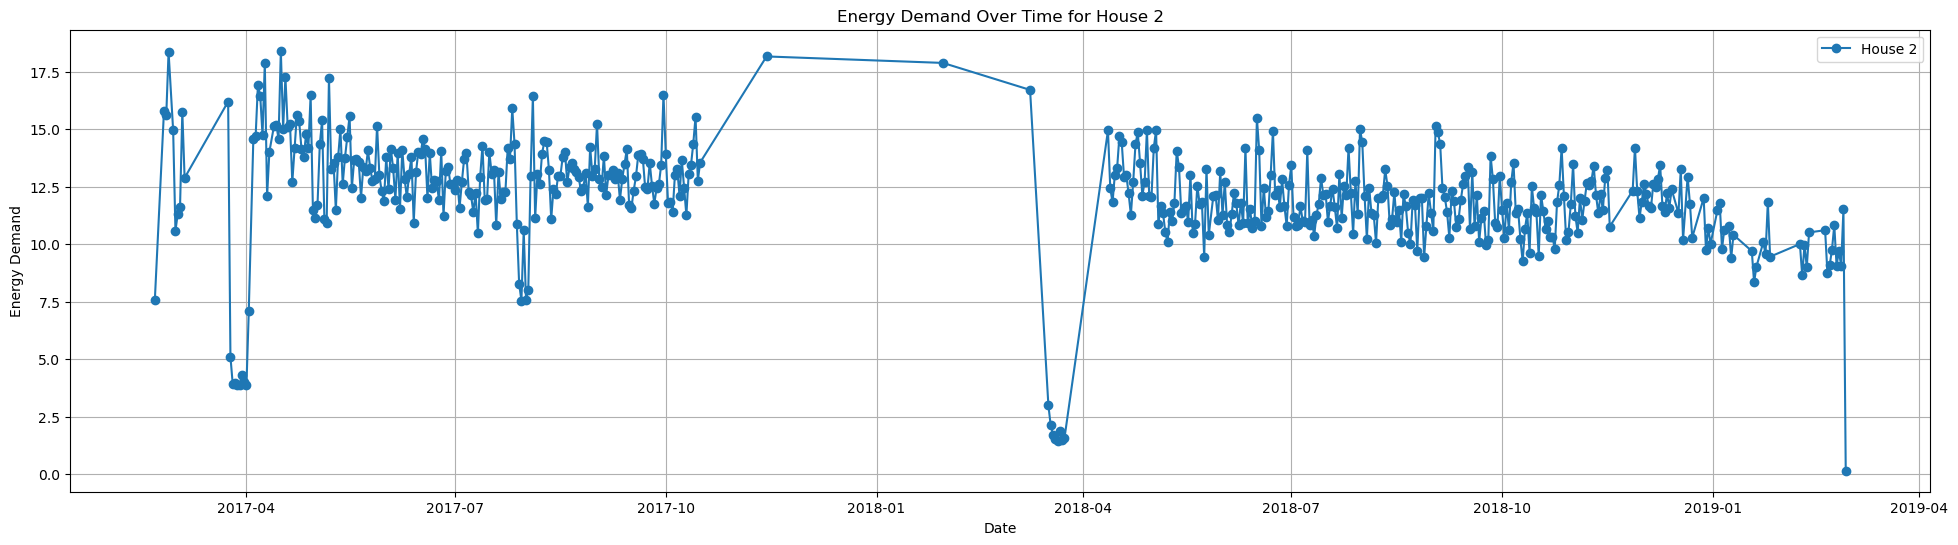

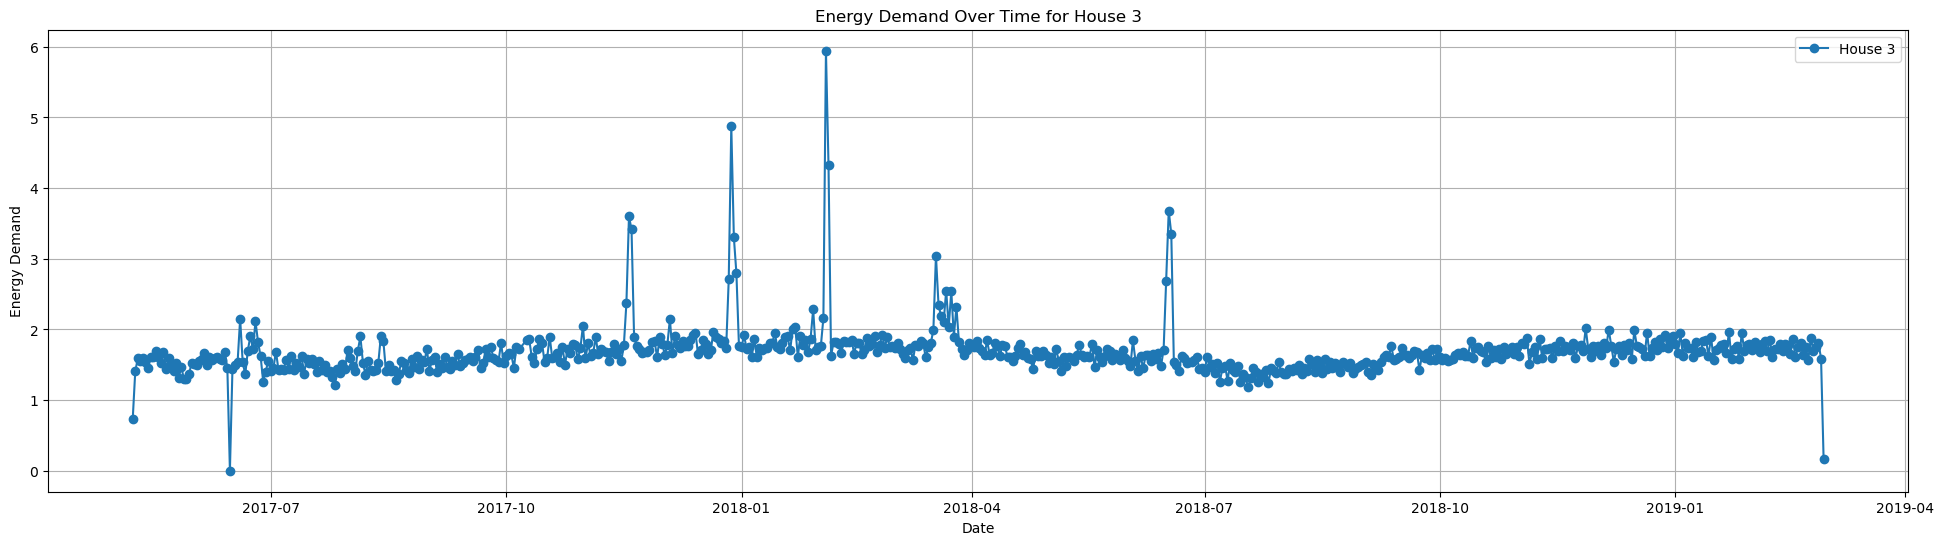

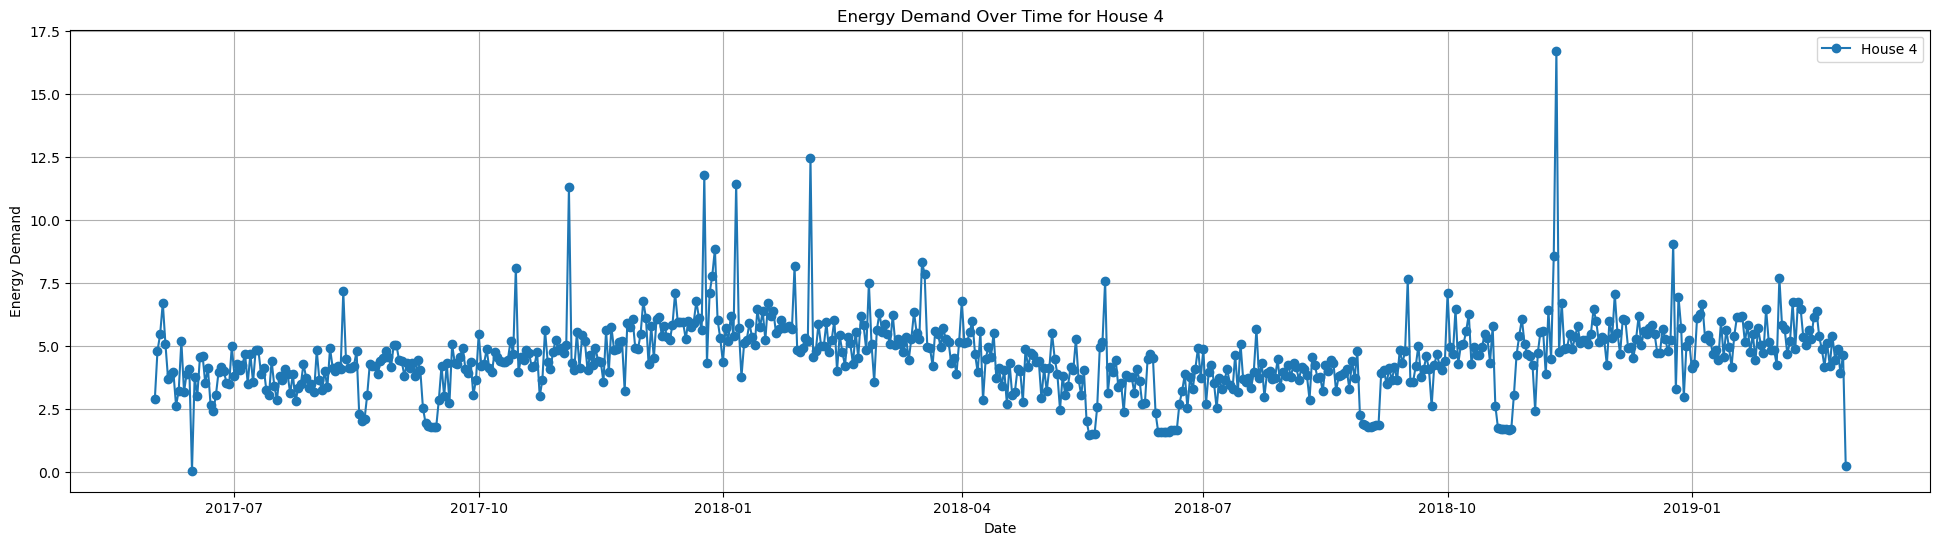

In [16]:
house_numbers = cleaned1_data['House_number'].unique()

for house_number in house_numbers:
    plt.figure(figsize=(24, 6))
    plt.plot(cleaned1_data[cleaned1_data['House_number'] == house_number].index, 
             cleaned1_data[cleaned1_data['House_number'] == house_number]['Energy Demand'], 
             marker='o', linestyle='-', label=f'House {house_number}')
    plt.title(f'Energy Demand Over Time for House {house_number}')
    plt.xlabel('Date')
    plt.ylabel('Energy Demand')
    plt.legend()
    plt.grid(True)
    plt.show()


D:\Program_Files\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Program_Files\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RMSE for House 1: 3.1771874444221875


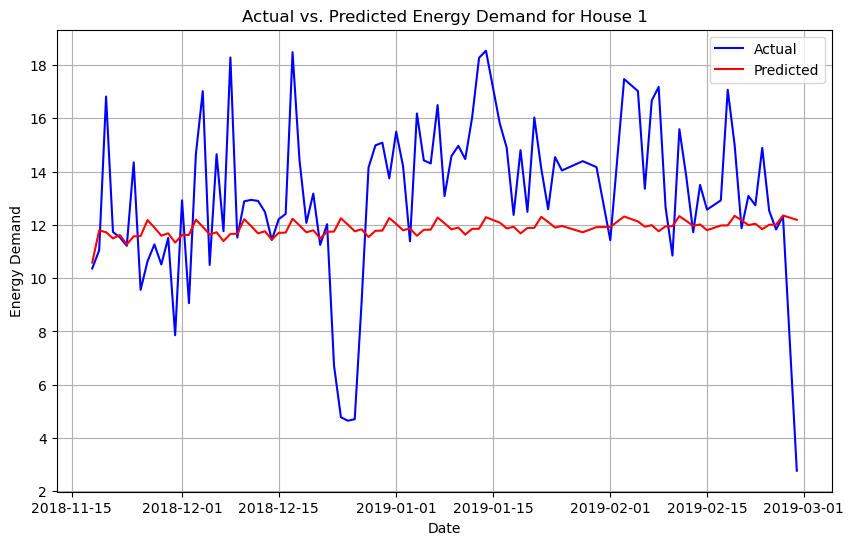

D:\Program_Files\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Program_Files\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RMSE for House 2: 2.068790292656834


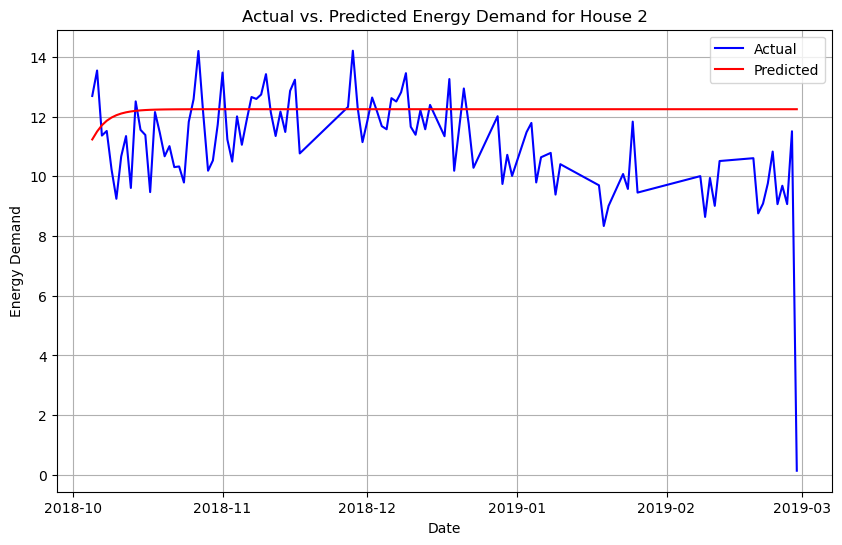

D:\Program_Files\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Program_Files\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RMSE for House 3: 0.21177244390493852


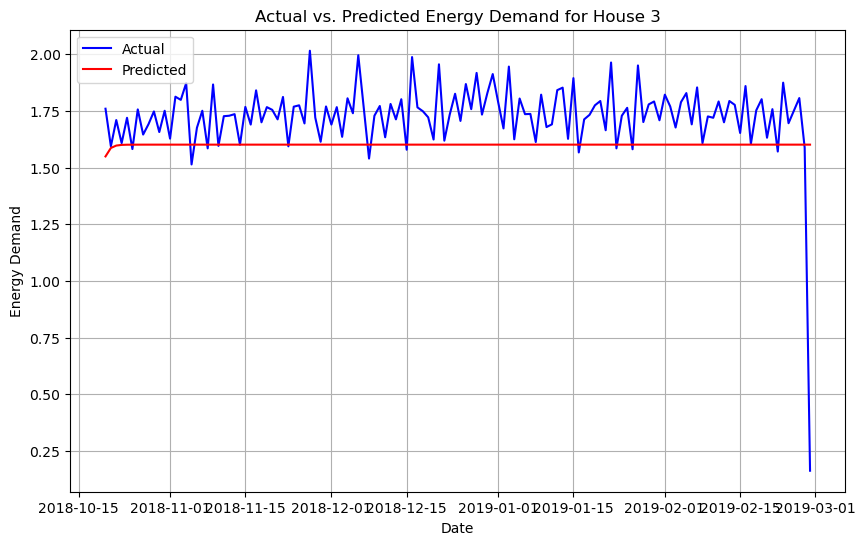

RMSE for House 4: 2.1068137614892013


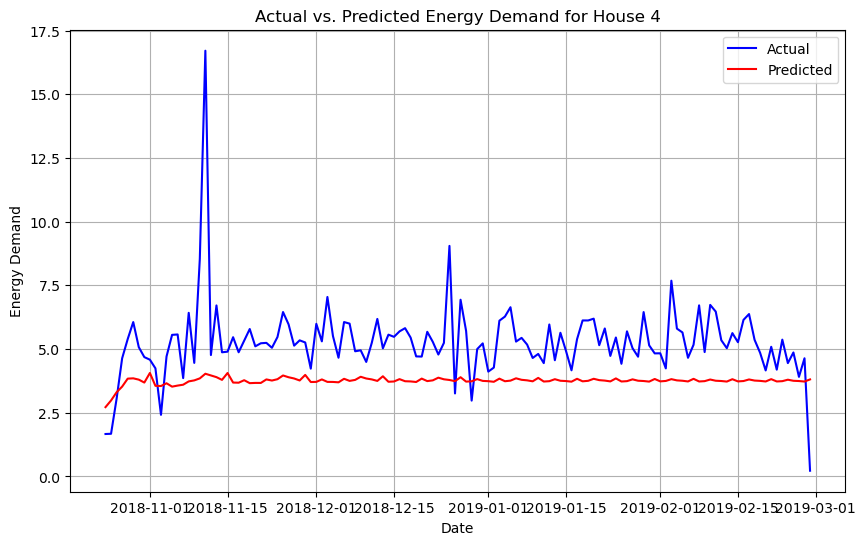

In [17]:
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

house_numbers = cleaned1_data['House_number'].unique()


for house_number in house_numbers:
    house_data = cleaned1_data[cleaned1_data['House_number'] == house_number]['Energy Demand']
    
    train_data, test_data = train_test_split(house_data, test_size=0.2, shuffle=False)
    
    model = auto_arima(train_data, seasonal=True, m=7)  
    
    predictions = model.predict(len(test_data))
    
    rmse = mean_squared_error(test_data, predictions, squared=False)
    print(f"RMSE for House {house_number}: {rmse}")


    plt.figure(figsize=(10, 6))
    plt.plot(test_data.index, test_data, label='Actual', color='blue')
    plt.plot(test_data.index, predictions, label='Predicted', color='red')
    plt.title(f'Actual vs. Predicted Energy Demand for House {house_number}')
    plt.xlabel('Date')
    plt.ylabel('Energy Demand')
    plt.legend()
    plt.grid(True)
    plt.show()


In [19]:
pickle.dump(model , open("model1.pkl" , "wb"))